<a href="https://colab.research.google.com/github/climate-and-health-datasci-Unicamp/HeatExposureMetrics/blob/main/02_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data analysis of Calgary heat exposure**

Create functions to compute heat exposure metrics and save dataframes with the daily metrics to be analyzed.

**inputs:** Calgary.csv, as preprocessed in the [previous notebook](https://github.com/climate-and-health-datasci-Unicamp/Iot_Forum_Heat_exposure_Calgary/blob/main/01_Preprocess_data.ipynb)

**operations:**
- explore distribution of the available data
- explore temperature behavior
- create functions to compute heat exposure metrics
- compute metrics for the thermostast sensor and outdoor temperatures
- plot the metrics behavior
- investigate if indoor temperatures are within ASHRAE 80% acceptability limits



##**Import libraries**

In [1]:
!pip install https://github.com/CenterForTheBuiltEnvironment/pythermalcomfort/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 614 kB 1.6 MB/s
  Created wheel for pythermalcomfort: filename=pythermalcomfort-2.5.2-py2.py3-none-any.whl size=52563 sha256=4d45d4b2c782adfbcadb108b12994037a7a492c25e344b2b62ff01747794a88a
  Stored in directory: /tmp/pip-ephem-wheel-cache-fg8nmp77/wheels/96/c6/59/67f37104ac06a8457552e73a546380bb11405db6c63394414f
Successfully built pythermalcomfort


In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 27.2 MB/s 
     |████████████████████████████████| 16.7 MB 31.0 MB/s 


In [3]:
!pip install pandas_bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install git+https://github.com/PatrikHlobil/Pandas-Bokeh.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PatrikHlobil/Pandas-Bokeh.git to /tmp/pip-req-build-wnt9fozt
  Running command git clone -q https://github.com/PatrikHlobil/Pandas-Bokeh.git /tmp/pip-req-build-wnt9fozt
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/pip/_vendor/pep517/in_process/_in_process.py prepare_metadata_for_build_wheel /tmp/tmpv2_3gx9e Check the logs for full command output.


In [5]:
import pandas as pd
import numpy as np
import scipy
import pylab
import plotly.express as px
import datetime as dt
import pythermalcomfort as tc

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import PercentFormatter
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import geopandas 
from shapely.geometry import Point, Polygon

import pandas_bokeh
pandas_bokeh.output_notebook()

from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import ColumnDataSource
from bokeh.palettes import Reds
from bokeh.plotting import figure, show

from bokeh.io import curdoc, show
from bokeh.models import Grid, LinearAxis, Plot, Text, LinearColorMapper

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


##**Load data**

In [6]:
#load data from calgary
cg = pd.read_csv('Calgary.csv')
cg = cg.drop(columns={'Unnamed: 0'})
cg['Datetime'] = pd.to_datetime(cg['Datetime'])
cg['DATE'] = cg['Datetime'].dt.strftime('%Y-%m-%d') #create date column
cg['running_mean'] = cg['Tmean_out'].rolling(7).apply(tc.utilities.running_mean_outdoor_temperature) #create running mean using the 7 previous days
cg = cg.sort_values('Datetime')

##**Geoplots**

In [7]:
!wget http://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/gfsa000b11a_e.zip

--2022-10-07 01:13:54--  http://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/gfsa000b11a_e.zip
Resolving www12.statcan.gc.ca (www12.statcan.gc.ca)... 167.44.105.15
Connecting to www12.statcan.gc.ca (www12.statcan.gc.ca)|167.44.105.15|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/gfsa000b11a_e.zip [following]
--2022-10-07 01:13:54--  https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/gfsa000b11a_e.zip
Connecting to www12.statcan.gc.ca (www12.statcan.gc.ca)|167.44.105.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65516799 (62M) [application/x-zip-compressed]
Saving to: ‘gfsa000b11a_e.zip’

gfsa000b11a_e.zip   100%[===================>]  62.48M  6.02MB/s    in 11s     

2022-10-07 01:14:05 (5.66 MB/s) - ‘gfsa000b11a_e.zip’ saved [65516799/65516799]



In [8]:
!unzip gfsa000b11a_e.zip

Archive:  gfsa000b11a_e.zip
  inflating: gfsa000b11a_e.shx       
  inflating: gfsa000b11a_e.dbf       
  inflating: gfsa000b11a_e.prj       
  inflating: gfsa000b11a_e.shp       
  inflating: 92-179-g2011001-eng.pdf  


In [9]:
canada = geopandas.read_file("./gfsa000b11a_e.shp")
alberta = canada[canada['PRUID'] == '48']

In [10]:
!pip install pandas_bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install git+https://github.com/PatrikHlobil/Pandas-Bokeh.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PatrikHlobil/Pandas-Bokeh.git to /tmp/pip-req-build-yt9att7g
  Running command git clone -q https://github.com/PatrikHlobil/Pandas-Bokeh.git /tmp/pip-req-build-yt9att7g
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/pip/_vendor/pep517/in_process/_in_process.py prepare_metadata_for_build_wheel /tmp/tmpznqvaluv Check the logs for full command output.


In [12]:
import pandas_bokeh
pandas_bokeh.output_notebook()

from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import ColumnDataSource
from bokeh.palettes import RdBu3
from bokeh.palettes import Reds
from bokeh.plotting import figure, show

from bokeh.io import curdoc, show
from bokeh.models import Grid, LinearAxis, Plot, Text, LinearColorMapper

In [13]:
aux_cg = cg.drop_duplicates('Identifier',keep='first')
aux_cg = aux_cg['postal_code'].value_counts().to_frame()
aux_cg = aux_cg.reset_index()
aux_cg = aux_cg.rename(columns = {'index':'CFSAUID','postal_code':'Count'})

aux_cg = pd.merge(alberta,aux_cg,on='CFSAUID')

In [14]:
stations = pd.DataFrame()
stations['name'] = ['Calgary Intl CS']
stations['Latitude'] = [51.1225]
stations ['Longitude'] = [-114.0133]

list_stations = [Point(xy) for xy in zip(stations['Longitude'],stations['Latitude'])]
crs = {'init':'EPSG:4326'}
stations_df = geopandas.GeoDataFrame(stations,crs=crs,geometry=list_stations)
stations_df

name  Latitude  Longitude                     geometry
0  Calgary Intl CS   51.1225  -114.0133  POINT (-114.01330 51.12250)

In [15]:
cmap = Reds[9]
cmap = cmap[1:7]

figure = aux_cg.plot_bokeh(simplify_shapes=1, category="Count", colormap=cmap[::-1], show_figure=False,
                            hovertool_columns=["CFSAUID","Count"],legend=False,title='Distribution of the analyzed houses in Calgary')

stations_df[0:1].plot_bokeh(marker='o',figure=figure,color='black', size=15)

Figure(id='1002', ...)

##**Temperatures**

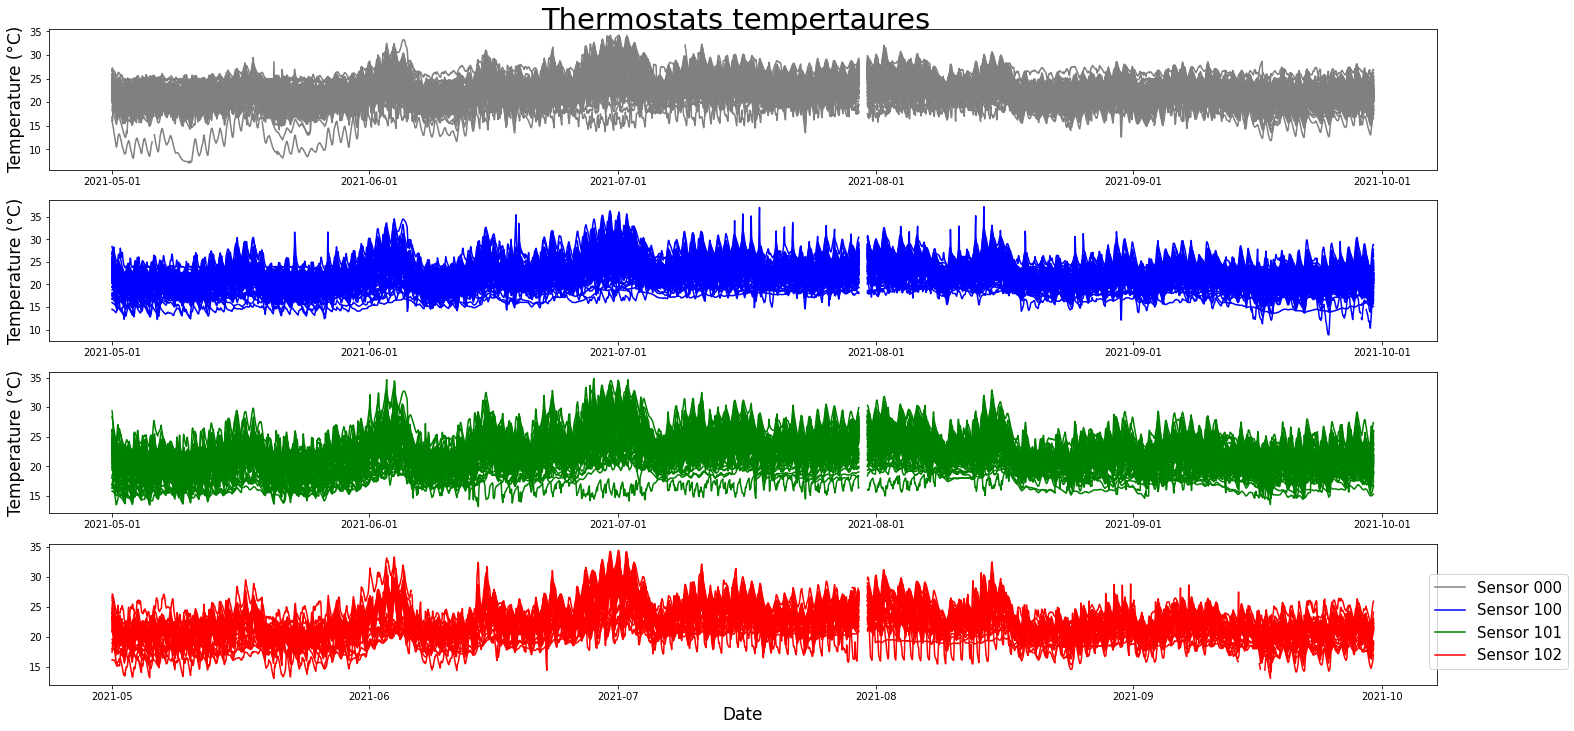

In [16]:
ids = cg['Identifier'].unique()

#create fig and set title
fig, ax = plt.subplots(figsize=(20, 10),nrows=4,ncols=1)
fig.suptitle("Thermostats tempertaures", fontsize = 29)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

#plots
for i in range(len(ids)):
  id = ids[i]
  sub = cg[cg['Identifier']==id]
  sub['Datetime'] = pd.to_datetime(sub['Datetime'])
  #sub = sub[(sub['Datetime']>='2021-06-15') & (sub['Datetime']<='2021-07-15')]

  sensor0, = ax[0].plot(sub['Datetime'],sub['SensorTemp000'],color='gray')
  sensor1, = ax[1].plot(sub['Datetime'],sub['SensorTemp100'],color='blue')
  sensor2, = ax[2].plot(sub['Datetime'],sub['SensorTemp101'],color='green')
  sensor3, = ax[3].plot(sub['Datetime'],sub['SensorTemp102'],color='red')
  
  plt.xlabel("Date", fontsize = 17)

#date formating
for i in range(3):
    ax[i].set_ylabel("Temperature (°C)",fontsize = 17)
    #ax[i].set_xlim([dt.date(2021, 6, 15), dt.date(2021, 7, 15)])
    date_form = DateFormatter("%Y-%m-%d")
    ax[i].xaxis.set_major_formatter(date_form)

    if not bool(ax[i].has_data()):
      fig.delaxes(ax[i]) ## delete if nothing is plotted in the axes obj

# Create iterables handles and labels
handles = [sensor0, sensor1, sensor2, sensor3]
labels = ['Sensor 000','Sensor 100','Sensor 101','Sensor 102']
# Pass handles and lables to plt.legend()
plt.legend(handles, labels, fontsize= 15, loc='lower right',bbox_to_anchor=(1.1, 0.06))

plt.show()

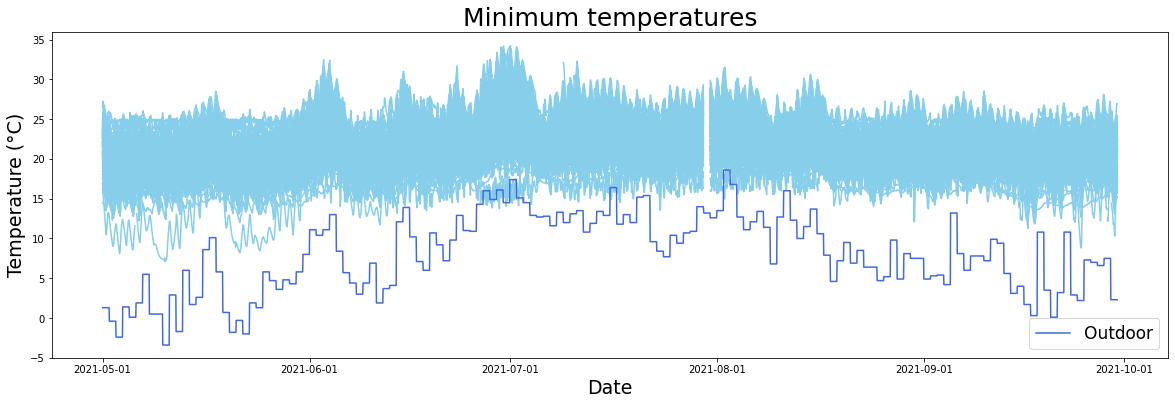

In [17]:
#TMIN
fig, ax = plt.subplots(figsize=(20, 6))

for i in range(len(ids)):
  id = ids[i]
  sub = cg[cg['Identifier']==id]
  sub['Datetime'] = pd.to_datetime(sub['Datetime'])
  ax.plot(sub['Datetime'],sub['Tmin'],color='skyblue')

#outdoor
plt.plot(cg['Datetime'],cg['Tmin_out'],color='royalblue',label='Outdoor')

# Set title and labels for axes
ax.set_title("Minimum temperatures", fontsize = 25)
ax.set_xlabel("Date", fontsize = 19)
ax.set_ylabel("Temperature (°C)",fontsize = 19)

ax.set_ylim(-5,36)

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.legend(fontsize=17,loc='lower right')
plt.show()

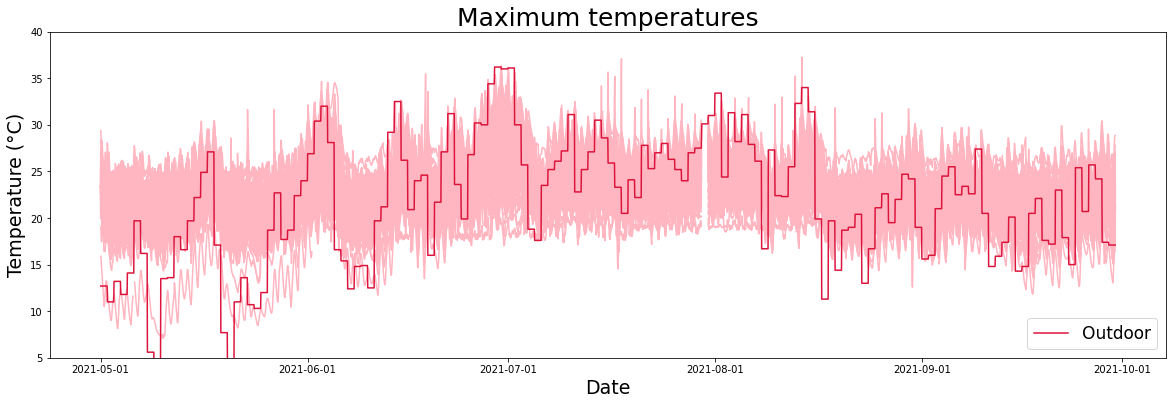

In [18]:
#TMAX
fig, ax = plt.subplots(figsize=(20, 6))

for i in range(len(ids)):
  id = ids[i]
  sub = cg[cg['Identifier']==id]
  sub['Datetime'] = pd.to_datetime(sub['Datetime'])
  ax.plot(sub['Datetime'],sub['Tmax'],color='lightpink')

#outdoor
plt.plot(cg['Datetime'],cg['Tmax_out'],color='crimson',label='Outdoor')

# Set title and labels for axes
ax.set_title("Maximum temperatures", fontsize = 25)
ax.set_xlabel("Date", fontsize = 19)
ax.set_ylabel("Temperature (°C)",fontsize = 19)

ax.set_ylim(5,40)

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.legend(fontsize=17,loc='lower right')
plt.show()

##**Functions**

Compute the metrics (daily):

- **mean_HT:** mean house temperature
- **max_HT:** maximum house temperature
- **phat:** percentage of hours above the threshold
- **dhat:** degree hours above the threshold (integral of the curve above the threshold)
- **lep:** longest exposure period (maximum sequence of hours above the threshold)

In [19]:
#mean house temperature
def mean_HT(data,column,group='Identifier'):

  df_new= data.groupby(['Identifier','DATE']).mean()[column]
  df_new = df_new.reset_index()
  df_new = df_new.rename(columns={column:'mean_HT'})

  return df_new

#maximum house temperature
def max_HT(data, column, group='Identifier'):

  df_new = data.groupby([group,'DATE']).max()[column]
  df_new = df_new.reset_index()
  df_new = df_new.rename(columns={column:'max_HT'})

  return df_new

#percentage of hours above thershold
def phat(data,column,criteria=26,group='Identifier'):
  #create column to indicate if the temperature measure was above the threshold
  data['above_criteria'] = np.where(data[column]>=criteria,1,0)#1 if >= and 0 otherwise

  #column indicating total of measurements above the criteria
  df_new = data.groupby([group,'DATE']).sum()['above_criteria']

  df_new = df_new.reset_index()

  #create pct column dividing 'sum_above_criteria' by number of unique datetime values
  df_new['phat'] = round((df_new['above_criteria']/24)*100,2)
  
  del data['above_criteria']
  del df_new['above_criteria']
  return df_new

#degree hours above threshold
def dhat(data,column, criteria=26, group='Identifier'):
  #create column to indicate if the temperature measure was above the threshold
  data['above_criteria'] = np.where(data[column]>=criteria,1,0)#1 if >= and 0 otherwise

  #column indicating total of measurements above the criteria
  data['temp_above'] = np.where(data['above_criteria']==1,data[column] - criteria,0)
  df_new = data.groupby([group,'DATE']).sum()['temp_above']

  #reset index and fix column name
  df_new = df_new.reset_index()
  df_new = df_new.rename(columns={'temp_above':'dhat'})

  del data['temp_above']
  del data['above_criteria']
  return df_new

#auxiliar function to get sequence for lep
def get_max_seq(x,col='above_criteria'):
  v = x[col].values
  if (np.sum(v)==0):
    return 0
  v = np.hstack(([False],v,[False]))
  idxs = np.where(np.diff(v))[0].reshape(-1,2)
  lengths = np.diff(idxs,axis=1)
  max_length = np.max(lengths)

  return max_length

#longest exposure period
def lep(data, column, criteria=26, group='Identifier'):
  # create column to indicate if the temperature measure was above the threshold
  data['above_criteria'] = np.where(data[column] >= criteria, True, False)  # 1 if >= and 0 otherwise

  df_new = data.groupby([group,'DATE']).apply(get_max_seq)
  
  #reset index and fix column name
  df_new = df_new.reset_index()
  df_new = df_new.rename(columns={0:'lep'})

  del data['above_criteria']
  return df_new

##**Get daily metrics**

In [20]:
#using the functions, get the daily metrics for the indoor temperatures
#the sensor on the thermostat was used (sensor 0)
cg_metrics_sensor0 = cg.drop_duplicates(['Identifier','DATE'],keep='first')
cg_metrics_sensor0 = cg_metrics_sensor0[['Identifier','DATE']]
cg_metrics_sensor0 = cg_metrics_sensor0.sort_values('Identifier')

aux = mean_HT(cg,'SensorTemp000')
cg_metrics_sensor0 = pd.merge(cg_metrics_sensor0,aux,on=['Identifier','DATE'])

aux = max_HT(cg,'SensorTemp000')
cg_metrics_sensor0 = pd.merge(cg_metrics_sensor0,aux,on=['Identifier','DATE'])

aux = phat(cg,'SensorTemp000')
cg_metrics_sensor0 = pd.merge(cg_metrics_sensor0,aux,on=['Identifier','DATE'])

aux = dhat(cg,'SensorTemp000')
cg_metrics_sensor0 = pd.merge(cg_metrics_sensor0,aux,on=['Identifier','DATE'])

aux = lep(cg,'SensorTemp000')
cg_metrics_sensor0 = pd.merge(cg_metrics_sensor0,aux,on=['Identifier','DATE'])

In [21]:
#using the functions, get the daily metrics for the outdoor temperatures
cg_metrics_out = cg.drop_duplicates(['Identifier','DATE'],keep='first')
cg_metrics_out = cg_metrics_out[['Identifier','DATE','HW']]
cg_metrics_out = cg_metrics_out.sort_values('Identifier')

aux = mean_HT(cg,'Out_temp')
cg_metrics_out = pd.merge(cg_metrics_out,aux,on=['Identifier','DATE'])

aux = max_HT(cg,'Out_temp')
cg_metrics_out = pd.merge(cg_metrics_out,aux,on=['Identifier','DATE'])

aux = phat(cg,'Out_temp')
cg_metrics_out = pd.merge(cg_metrics_out,aux,on=['Identifier','DATE'])

aux = dhat(cg,'Out_temp')
cg_metrics_out = pd.merge(cg_metrics_out,aux,on=['Identifier','DATE'])

aux = lep(cg,'Out_temp')
cg_metrics_out = pd.merge(cg_metrics_out,aux,on=['Identifier','DATE'])

cg_metrics_out = cg_metrics_out.drop_duplicates('DATE')

In [22]:
cg_metrics_sensor0.describe()

mean_HT        max_HT          phat          dhat           lep
count  28827.000000  28827.000000  29184.000000  29184.000000  29184.000000
mean      22.563105     24.009374      8.938996      3.188740      1.750137
std        2.334901      2.542765     22.816603     12.030923      4.674646
min        7.977816      9.115741      0.000000      0.000000      0.000000
25%       20.987044     22.199074      0.000000      0.000000      0.000000
50%       22.333333     23.745370      0.000000      0.000000      0.000000
75%       24.035397     25.560185      0.000000      0.000000      0.000000
max       33.303048     34.236111    100.000000    175.273148     24.000000

In [23]:
cg_metrics_out.describe()

HW     mean_HT      max_HT        phat        dhat         lep
count  152.000000  152.000000  152.000000  152.000000  152.000000  152.000000
mean     0.046053   15.112232   21.305921    7.401382    5.722368    1.763158
std      0.210292    5.571119    6.799262   14.742538   15.802272    3.531761
min      0.000000    0.595833    2.600000    0.000000    0.000000    0.000000
25%      0.000000   11.046875   16.300000    0.000000    0.000000    0.000000
50%      0.000000   15.318750   22.000000    0.000000    0.000000    0.000000
75%      0.000000   19.060417   26.025000    4.170000    0.025000    1.000000
max      1.000000   27.362500   35.600000   58.330000   90.700000   14.000000

##**Plots**

In [24]:
def get_plots(df,m,city):    
    fig = px.histogram(df, x = m, nbins=20,title=m,
      width=700, height=500,histnorm='probability density',)
    fig.update_layout(yaxis_title="Number of houses")
    fig.show()

    fig = px.box(df, y = m, title=f'{city} - {m}',
      width=400, height=400)
    fig.show()

In [25]:
list_metrics = ['mean_HT','max_HT','phat','dhat','lep']

for m in list_metrics:
  get_plots(cg_metrics_sensor0,m,'Calgary')

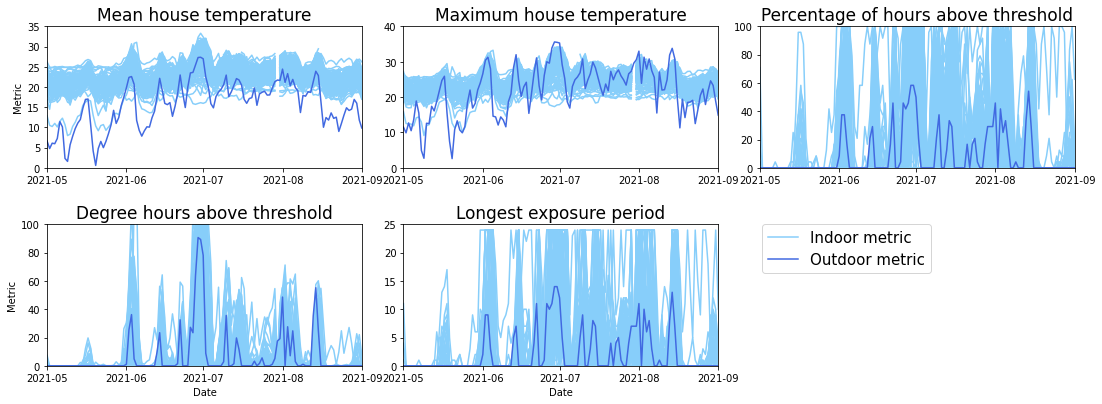

In [26]:
#create subplots
fig, ax = plt.subplots(figsize=(15, 6),nrows=2,ncols=3)
fig.suptitle("", fontsize = 25)
fig.tight_layout()
fig.subplots_adjust(top=0.85,hspace=0.4)

#list with metrics and auxiliar variable
metrics = ['mean_HT','max_HT','phat','dhat','lep']
m = 0

cg_metrics_sensor0['DATE'] = pd.to_datetime(cg_metrics_sensor0['DATE'][0:]) #convert to datetime
ids = cg_metrics_sensor0['Identifier'].unique() #list of ids

for i in range(2):
  for j in range(3):
    if(m==5):
      break
    else:
      metric = metrics[m]
      #xlim
      ax[i,j].set_xlim(cg_metrics_sensor0.DATE.iloc[0], cg_metrics_sensor0.DATE.iloc[-1])
      #ylim
      min_val = min(cg_metrics_out[metric].min(),cg_metrics_out[metric].min())
      max_val = max(cg_metrics_out[metric].max(),cg_metrics_out[metric].max())
      ax[i,j].set_ylim((min_val -1),(max_val+1))
      #format xticks
      ax[i,j].set_xticks([dt.datetime(2021,5,1),dt.datetime(2021,6,1),dt.datetime(2021,7,1),dt.datetime(2021,8,1),dt.datetime(2021,9,1)])
      date_form = DateFormatter("%Y-%m")
      ax[i,j].xaxis.set_major_formatter(date_form)

      for k in range(len(ids)):
        #subset for each identifier
        id = ids[k]
        sub = cg_metrics_sensor0[cg_metrics_sensor0['Identifier']==id]
        sub['DATE'] = pd.to_datetime(sub['DATE'][0:])
        sub = sub.sort_values('DATE')
        ax[i,j].plot(sub['DATE'],sub[metric],color='lightskyblue')
      ax[i,j].plot(sub['DATE'],sub[metric],color='lightskyblue',label='Indoor metric')
      m += 1 #increase aux variable

#convert to datetime and sort values
cg_metrics_out['DATE'] = pd.to_datetime(cg_metrics_out['DATE'])
cg_metrics_out = cg_metrics_out.sort_values('DATE')

ax[0,0].plot(cg_metrics_out['DATE'],cg_metrics_out['mean_HT'],color='royalblue',label='Outdoor metric')
ax[0,0].set_title('Mean house temperature',fontsize=17)
ax[0,0].set_ylim(0,35)

ax[0,1].plot(cg_metrics_out['DATE'],cg_metrics_out['max_HT'],color='royalblue',label='Outdoor metric')
ax[0,1].set_title('Maximum house temperature',fontsize=17)
ax[0,1].set_ylim(0,40)

ax[0,2].plot(cg_metrics_out['DATE'],cg_metrics_out['phat'],color='royalblue',label='Outdoor metric')
ax[0,2].set_title('Percentage of hours above threshold',fontsize=17)
ax[0,2].set_ylim(0,100)

ax[1,0].plot(cg_metrics_out['DATE'],cg_metrics_out['dhat'],color='royalblue',label='Outdoor metric')
ax[1,0].set_title('Degree hours above threshold',fontsize=17)
ax[1,0].set_ylim(0,100)

ax[1,1].plot(cg_metrics_out['DATE'],cg_metrics_out['lep'],color='royalblue',label='Outdoor metric')
ax[1,1].set_title('Longest exposure period',fontsize=17)
ax[1,1].set_ylim(0,25)

for i in range(2):
  for j in range(3):
    if not bool(ax[i,j].has_data()):
      fig.delaxes(ax[i,j]) # not show empty plot

plt.legend(loc='lower right',bbox_to_anchor=(1.7, 0.6),fontsize=15)

# set labels
plt.setp(ax[-1,:], xlabel='Date')
plt.setp(ax[:,0], ylabel='Metric')
plt.show()

##**ASHRAE 80% acceptability limit**

[ASHRAE 55](https://www.ashrae.org/technical-resources/bookstore/standard-55-thermal-environmental-conditions-for-human-occupancy) adaptative model has 80% acceptability temperature limits, given by:

$$upper_{80} = 0.31*\overline{t_{pma(out)}} + 21.3$$

$$lower_{80} = 0.31*\overline{t_{pma(out)}} + 14.3$$

where $\overline{t_{pma(out)}}$ is the running mean of the outdoor temperature.

We used a period of 7 days to compute the running mean and the function from the [pythermalcomfort library](https://pypi.org/project/pythermalcomfort/).



In [27]:
cg['lower_limit'] = 0.31*cg['running_mean'] + 14.3
cg['upper_limit'] = 0.31*cg['running_mean'] + 21.3

columns = ['Tmax','SensorTemp000']

for c in columns:
  above_upper = cg[cg[c]>cg['upper_limit']]
  below_lower = cg[cg[c]<cg['lower_limit']]
  
  print(f'{c}')
  print(f'Percentage of values above the upper limit: {round((len(above_upper)/len(cg))*100,2)} %')
  print(f'Percentage of values below the lower limit: {round((len(below_lower)/len(cg))*100,2)} % \n')

Tmax
Percentage of values above the upper limit: 7.26 %
Percentage of values below the lower limit: 2.56 % 

SensorTemp000
Percentage of values above the upper limit: 4.66 %
Percentage of values below the lower limit: 3.67 % 



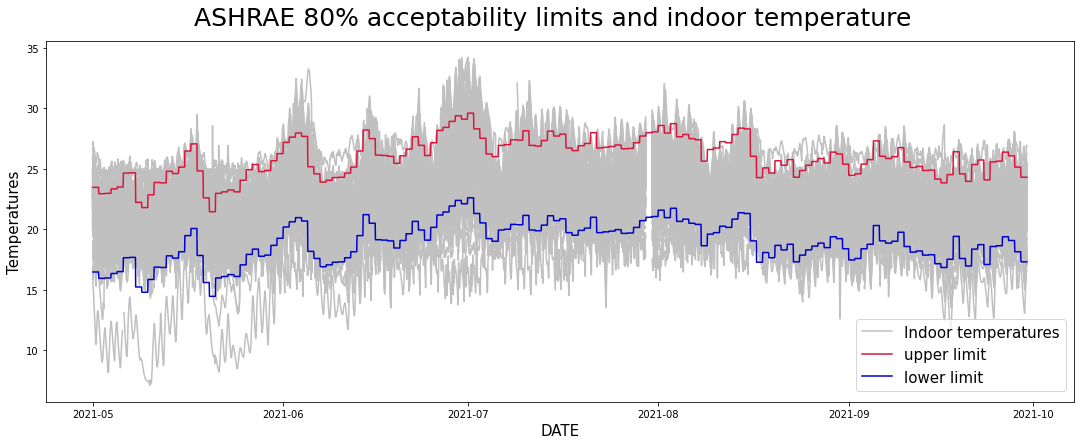

In [28]:
#create fig and set title
fig, ax = plt.subplots(figsize=(15, 6),nrows=1,ncols=1)
fig.suptitle("ASHRAE 80% acceptability limits and indoor temperature", fontsize = 25)
fig.tight_layout()
fig.subplots_adjust(top=0.9,hspace=0.4)

for i in range(len(ids)):
  #subset for each identifier
  id = ids[i]
  sub = cg[cg['Identifier']==id]
  sub['Datetime'] = pd.to_datetime(sub['Datetime'])
  ax.plot(sub['Datetime'],sub['SensorTemp000'],color='silver')
ax.plot(sub['Datetime'],sub['SensorTemp000'],color='silver',label='Indoor temperatures')

aux = cg.drop_duplicates('Datetime')

#plot ASHRAE limits
ax.plot(aux['Datetime'],aux['upper_limit'],color='crimson',label='upper limit')
ax.plot(aux['Datetime'],aux['lower_limit'],color='mediumblue',label='lower limit')

plt.legend(loc='lower right',bbox_to_anchor=(1.0, 0.01),fontsize=15)

ax.set_xlabel('DATE',fontsize=15)
ax.set_ylabel('Temperatures',fontsize=15)
plt.show()

In [29]:
#function to compute the percentage of hours above the ASHRAE limit per day
def ph80(data,column,running_mean,group='Identifier'):
  #create column with the value of the upper limit
  data['upper_limit'] = data[running_mean]*0.31+21.3
  #create column to indicate with the temperature is above the limit
  data['above_limit'] = np.where(data[column]>data['upper_limit'],1,0)
  
  #column indicating total of measurements above the limit
  df_new = data.groupby([group,'DATE']).sum()['above_limit']
  df_new = df_new.reset_index()
  #create pct column dividing 'sum_above_criteria' by number of unique datetime values
  df_new['ph80'] = round((df_new['above_limit']/24)*100,2)

  del df_new['above_limit']
  return df_new

In [30]:
new_df = ph80(cg,'SensorTemp000','running_mean')
new_df.describe()

ph80
count  29184.000000
mean       4.660981
std       15.037041
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      100.000000

In [41]:
#auxiliar dataset with the mean for each identifier (mean of percentage above 80% acceptability limit)
aux = new_df.groupby('Identifier').mean()
aux = aux.reset_index()
aux['Identifier'] = aux['Identifier'].astype('category').cat.codes #anonimize before print
aux.sort_values('ph80')

Identifier       ph80
0             0   0.000000
21           21   0.000000
29           29   0.000000
156         156   0.000000
144         144   0.000000
..          ...        ...
78           78  23.300658
180         180  24.396974
97           97  29.440789
181         181  40.049342
110         110  70.669079

[192 rows x 2 columns]

In [43]:
aux.describe()['ph80']

count    192.000000
mean       4.660981
std        7.413042
min        0.000000
25%        0.712763
50%        2.371217
75%        5.701891
max       70.669079
Name: ph80, dtype: float64